In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
from matplotlib.colors import LinearSegmentedColormap
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import precision_score, recall_score, roc_auc_score

In [2]:
df = pd.read_csv("air_gases_data_7000.csv")

In [3]:
df.head()

,NH3,CO,O3,NO2,NOx,Overall AQI,Temp,Pres,Alt,Real Alt
0,1.31,0.59,0.44,0.46,1.44,8,33.4,1006.19,58.69,73.57
1,4.23,3.80,1.57,1.89,5.43,32,33.4,1006.17,58.86,73.31
2,3.03,2.24,1.09,1.26,3.73,22,33.4,1006.23,58.53,73.23
3,5.67,6.06,2.15,2.70,7.57,45,33.4,1006.24,58.78,73.23
4,23.94,60.03,10.19,15.47,38.67,360,33.5,1006.23,57.94,72.23


In [4]:
def get_AQI_bucket(x):
    if x >= 0 and x <= 50:
        return "Good"
    elif x > 50 and x <= 100:
        return "Satisfactory"
    elif x > 100 and x <= 200:
        return "Moderate"
    elif x > 200 and x <= 300:
        return "Poor"
    elif x > 300 and x <= 400:
        return "Very Poor"
    elif x > 400 and x <= 500:
        return "Severe"
    else:
        return 'Hazardous'

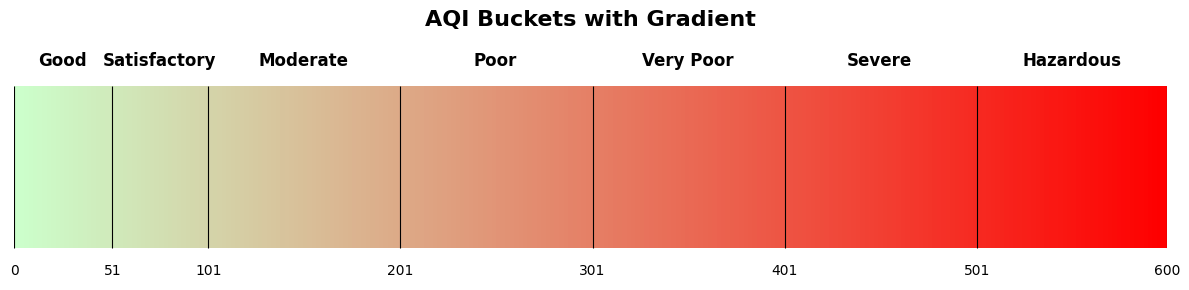

In [5]:
buckets = [
    ("Good", 0, 50),
    ("Satisfactory", 51, 100),
    ("Moderate", 101, 200),
    ("Poor", 201, 300),
    ("Very Poor", 301, 400),
    ("Severe", 401, 500),
    ("Hazardous", 501, 600)
]

colors = ["#ccffcc", "#ff0000"]
cmap = LinearSegmentedColormap.from_list("LightGreenToRed", colors)

fig, ax = plt.subplots(figsize=(12, 3))

gradient = np.linspace(0, 1, 600).reshape(1, -1)
ax.imshow(gradient, aspect='auto', cmap=cmap, extent=[0, 600, 0, 1])

for label, start, end in buckets:
    mid = (start + end) / 2
    ax.text(mid, 1.1, label, ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

boundaries = [start for _, start, _ in buckets] + [buckets[-1][2]]
for b in boundaries:
    ax.vlines(b, 0, 1, colors='black', linewidth=0.8)

for b in boundaries:
    ax.text(b, -0.1, str(b), ha='center', va='top', fontsize=10, color='black')

ax.set_xlim(0, 600)
ax.set_ylim(-0.2, 1.2)
ax.axis('off')

ax.set_title("AQI Buckets with Gradient", fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

In [6]:
print(df.columns)

Index(['NH3', 'CO', 'O3', 'NO2', 'NOx', 'Overall AQI', 'Temp', 'Pres', 'Alt',
       'Real Alt'],
      dtype='object')


In [7]:
df["AQI_Bucket"] = df.get("AQI_Bucket", pd.Series([None] * len(df)))
df["AQI_Bucket"] = df["AQI_Bucket"].fillna(df["Overall AQI"].apply(lambda x: get_AQI_bucket(x)))
df['AQI_Bucket'].value_counts()

AQI_Bucket
Good            4377
Hazardous       1704
Satisfactory     376
Moderate         316
Poor             209
Very Poor        122
Severe           103
Name: count, dtype: int64

In [8]:
df.isnull().sum()

NH3            0
CO             0
O3             0
NO2            0
NOx            0
Overall AQI    0
Temp           0
Pres           0
Alt            0
Real Alt       0
AQI_Bucket     0
dtype: int64

In [9]:
newdf = df.dropna()

In [10]:
newdf.head()

,NH3,CO,O3,NO2,NOx,Overall AQI,Temp,Pres,Alt,Real Alt,AQI_Bucket
0,1.31,0.59,0.44,0.46,1.44,8,33.4,1006.19,58.69,73.57,Good
1,4.23,3.80,1.57,1.89,5.43,32,33.4,1006.17,58.86,73.31,Good
2,3.03,2.24,1.09,1.26,3.73,22,33.4,1006.23,58.53,73.23,Good
3,5.67,6.06,2.15,2.70,7.57,45,33.4,1006.24,58.78,73.23,Good
4,23.94,60.03,10.19,15.47,38.67,360,33.5,1006.23,57.94,72.23,Very Poor


In [11]:
newdf.sample()

,NH3,CO,O3,NO2,NOx,Overall AQI,Temp,Pres,Alt,Real Alt,AQI_Bucket
7045,23.68,59.0,10.07,15.27,38.19,354,33.8,999.68,113.6,128.03,Very Poor


In [12]:
def color_aqi(val):
    normalized = min(max(val, 0), 600) / 600
    r = int(204 + (255 - 204) * normalized)
    g = int(255 - 255 * normalized)
    b = int(204 - 204 * normalized)
    color = f'rgb({r},{g},{b})'
    return f'background-color: {color}'

styled_sample = newdf.sample().style.map(color_aqi, subset=['Overall AQI'])
display(styled_sample)

,NH3,CO,O3,NO2,NOx,Overall AQI,Temp,Pres,Alt,Real Alt,AQI_Bucket
6515,3.430000,2.720000,1.250000,1.460000,4.280000,25,33.200000,999.530000,114.270000,129.040000,Good


In [13]:
final_df = newdf[['Overall AQI','AQI_Bucket']].copy()
final_df

,Overall AQI,AQI_Bucket
0,8,Good
1,32,Good
2,22,Good
3,45,Good
4,360,Very Poor
...,...,...
7202,600,Hazardous
7203,101,Moderate
7204,11,Good
7205,600,Hazardous


In [14]:
final_df['AQI_Bucket'].unique()

array(['Good', 'Very Poor', 'Moderate', 'Satisfactory', 'Severe',
       'Hazardous', 'Poor'], dtype=object)

In [15]:
final_df['AQI_Bucket'] = final_df['AQI_Bucket'].map({
    "Good": 0,
    "Satisfactory": 1,
    "Moderate": 2,
    "Poor": 3,
    "Very Poor": 4,
    "Severe" : 5,
    "Hazardous": 6
})
final_df.sample()

,Overall AQI,AQI_Bucket
1363,0,0


In [16]:
X = final_df[['Overall AQI']]
y = final_df[['AQI_Bucket']]

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [19]:
y_pred = clf.predict(X_test)

99.93065187239945
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       889
           1       1.00      1.00      1.00        76
           2       1.00      1.00      1.00        62
           3       1.00      1.00      1.00        53
           4       1.00      1.00      1.00        24
           5       0.96      1.00      0.98        22
           6       1.00      1.00      1.00       316

    accuracy                           1.00      1442
   macro avg       0.99      1.00      1.00      1442
weighted avg       1.00      1.00      1.00      1442



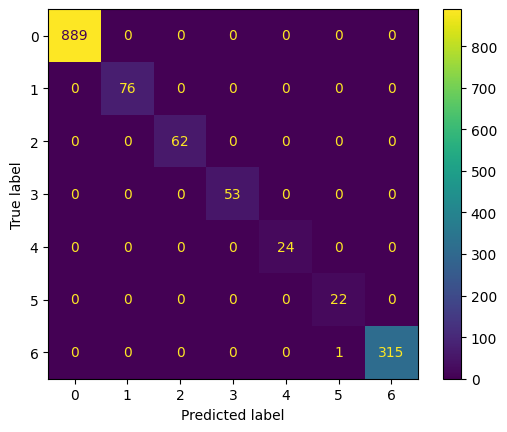

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
print(accuracy_score(y_test,y_pred)*100)
print(classification_report(y_test,y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))

disp.plot()

In [21]:
from sklearn.tree import DecisionTreeClassifier

start_time = time.time()
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

train_pred = DT.predict(X_train)
test_pred = DT.predict(X_test)

print("Model Accuracy on train is:", accuracy_score(y_train, train_pred) * 100)
print("Model Accuracy on test is:", accuracy_score(y_test, test_pred) * 100)
print("Mean Absolute Error (Train):", mean_absolute_error(y_train, train_pred))
print("Mean Absolute Error (Test):", mean_absolute_error(y_test, test_pred))
print("Root Mean Squared Error (Train):", np.sqrt(mean_squared_error(y_train, train_pred)))
print("Root Mean Squared Error (Test):", np.sqrt(mean_squared_error(y_test, test_pred)))

print("Precision (Train):", precision_score(y_train, train_pred, average='macro'))
print("Precision (Test):", precision_score(y_test, test_pred, average='macro'))
print("Recall (Train):", recall_score(y_train, train_pred, average='macro'))
print("Recall (Test):", recall_score(y_test, test_pred, average='macro'))

print("ROC AUC (Train):", roc_auc_score(y_train, DT.predict_proba(X_train), multi_class='ovr', average='macro'))
print("ROC AUC (Test):", roc_auc_score(y_test, DT.predict_proba(X_test), multi_class='ovr', average='macro'))

print(f"Training time for Decision Tree Classifier: {training_time:.4f} seconds")

Model Accuracy on train is: 100.0
Model Accuracy on test is: 99.93065187239945
Mean Absolute Error (Train): 0.0
Mean Absolute Error (Test): 0.0006934812760055479
Root Mean Squared Error (Train): 0.0
Root Mean Squared Error (Test): 0.026334032657486166
Precision (Train): 1.0
Precision (Test): 0.9937888198757764
Recall (Train): 1.0
Recall (Test): 0.9995479204339964
ROC AUC (Train): 1.0
ROC AUC (Test): 0.999723658406133
Training time for Decision Tree Classifier: 0.0034 seconds


In [22]:
from sklearn.ensemble import GradientBoostingClassifier

start_time = time.time()

GB = GradientBoostingClassifier()
GB.fit(X_train, y_train.values.ravel()) 

end_time = time.time()
training_time = end_time - start_time

train_pred = GB.predict(X_train)
test_pred = GB.predict(X_test)

print("Model Accuracy on train is:", accuracy_score(y_train, train_pred) * 100)
print("Model Accuracy on test is:", accuracy_score(y_test, test_pred) * 100)
print("Mean Absolute Error (Train):", mean_absolute_error(y_train, train_pred))
print("Mean Absolute Error (Test):", mean_absolute_error(y_test, test_pred))
print("Root Mean Squared Error (Train):", np.sqrt(mean_squared_error(y_train, train_pred)))
print("Root Mean Squared Error (Test):", np.sqrt(mean_squared_error(y_test, test_pred)))

print("Precision (Train):", precision_score(y_train, train_pred, average='macro'))
print("Precision (Test):", precision_score(y_test, test_pred, average='macro'))
print("Recall (Train):", recall_score(y_train, train_pred, average='macro'))
print("Recall (Test):", recall_score(y_test, test_pred, average='macro'))

print("ROC AUC (Train):", roc_auc_score(y_train, GB.predict_proba(X_train), multi_class='ovr', average='macro'))
print("ROC AUC (Test):", roc_auc_score(y_test, GB.predict_proba(X_test), multi_class='ovr', average='macro'))

print(f"Training time for GradientBoostingClassifier: {training_time:.4f} seconds")

Model Accuracy on train is: 100.0
Model Accuracy on test is: 99.93065187239945
Mean Absolute Error (Train): 0.0
Mean Absolute Error (Test): 0.0006934812760055479
Root Mean Squared Error (Train): 0.0
Root Mean Squared Error (Test): 0.026334032657486166
Precision (Train): 1.0
Precision (Test): 0.9937888198757764
Recall (Train): 1.0
Recall (Test): 0.9995479204339964
ROC AUC (Train): 1.0
ROC AUC (Test): 0.9998589610826368
Training time for GradientBoostingClassifier: 0.9040 seconds


In [23]:
from sklearn.neighbors import KNeighborsClassifier

start_time = time.time()

KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train.values.ravel())

end_time = time.time()
training_time = end_time - start_time

train_pred = KNN.predict(X_train)
test_pred = KNN.predict(X_test)

print("Model Accuracy on train is:", accuracy_score(y_train, train_pred) * 100)
print("Model Accuracy on test is:", accuracy_score(y_test, test_pred) * 100)
print("Mean Absolute Error (Train):", mean_absolute_error(y_train, train_pred))
print("Mean Absolute Error (Test):", mean_absolute_error(y_test, test_pred))
print("Root Mean Squared Error (Train):", np.sqrt(mean_squared_error(y_train, train_pred)))
print("Root Mean Squared Error (Test):", np.sqrt(mean_squared_error(y_test, test_pred)))

print("Precision (Train):", precision_score(y_train, train_pred, average='macro'))
print("Precision (Test):", precision_score(y_test, test_pred, average='macro'))
print("Recall (Train):", recall_score(y_train, train_pred, average='macro'))
print("Recall (Test):", recall_score(y_test, test_pred, average='macro'))

print("ROC AUC (Train):", roc_auc_score(y_train, KNN.predict_proba(X_train), multi_class='ovr', average='macro'))
print("ROC AUC (Test):", roc_auc_score(y_test, KNN.predict_proba(X_test), multi_class='ovr', average='macro'))

print(f"Training time for KNeighborsClassifier: {training_time:.4f} seconds")

Model Accuracy on train is: 100.0
Model Accuracy on test is: 99.93065187239945
Mean Absolute Error (Train): 0.0
Mean Absolute Error (Test): 0.0006934812760055479
Root Mean Squared Error (Train): 0.0
Root Mean Squared Error (Test): 0.026334032657486166
Precision (Train): 1.0
Precision (Test): 0.9937888198757764
Recall (Train): 1.0
Recall (Test): 0.9995479204339964
ROC AUC (Train): 1.0
ROC AUC (Test): 0.999723658406133
Training time for KNeighborsClassifier: 0.0064 seconds


In [24]:
from sklearn.naive_bayes import GaussianNB

start_time = time.time()

NB = GaussianNB()
NB.fit(X_train, y_train.values.ravel())

end_time = time.time()
training_time = end_time - start_time

train_pred = NB.predict(X_train)
test_pred = NB.predict(X_test)

print("Model Accuracy on train is:", accuracy_score(y_train, train_pred) * 100)
print("Model Accuracy on test is:", accuracy_score(y_test, test_pred) * 100)
print("Mean Absolute Error (Train):", mean_absolute_error(y_train, train_pred))
print("Mean Absolute Error (Test):", mean_absolute_error(y_test, test_pred))
print("Root Mean Squared Error (Train):", np.sqrt(mean_squared_error(y_train, train_pred)))
print("Root Mean Squared Error (Test):", np.sqrt(mean_squared_error(y_test, test_pred)))

print("Precision (Train):", precision_score(y_train, train_pred, average='macro'))
print("Precision (Test):", precision_score(y_test, test_pred, average='macro'))
print("Recall (Train):", recall_score(y_train, train_pred, average='macro'))
print("Recall (Test):", recall_score(y_test, test_pred, average='macro'))

print("ROC AUC (Train):", roc_auc_score(y_train, NB.predict_proba(X_train), multi_class='ovr', average='macro'))
print("ROC AUC (Test):", roc_auc_score(y_test, NB.predict_proba(X_test), multi_class='ovr', average='macro'))

print(f"Training time for GaussianNB: {training_time:.4f} seconds")

Model Accuracy on train is: 99.35819601040762
Model Accuracy on test is: 99.2371705963939
Mean Absolute Error (Train): 0.006418039895923678
Mean Absolute Error (Test): 0.0076282940360610264
Root Mean Squared Error (Train): 0.0801126700087051
Root Mean Squared Error (Test): 0.0873401055418473
Precision (Train): 0.9563495479982781
Precision (Test): 0.9548623419591162
Recall (Train): 0.9963777472890645
Recall (Test): 0.9956098955080888
ROC AUC (Train): 0.9994655719023336
ROC AUC (Test): 0.9992610122827236
Training time for GaussianNB: 0.0000 seconds


In [25]:
from sklearn.svm import SVC

start_time = time.time()

SVM = SVC(probability=True)
SVM.fit(X_train, y_train.values.ravel())

end_time = time.time()
training_time = end_time - start_time

train_pred = SVM.predict(X_train)
test_pred = SVM.predict(X_test)

print("Model Accuracy on train is:", accuracy_score(y_train, train_pred) * 100)
print("Model Accuracy on test is:", accuracy_score(y_test, test_pred) * 100)
print("Mean Absolute Error (Train):", mean_absolute_error(y_train, train_pred))
print("Mean Absolute Error (Test):", mean_absolute_error(y_test, test_pred))
print("Root Mean Squared Error (Train):", np.sqrt(mean_squared_error(y_train, train_pred)))
print("Root Mean Squared Error (Test):", np.sqrt(mean_squared_error(y_test, test_pred)))

print("Precision (Train):", precision_score(y_train, train_pred, average='macro'))
print("Precision (Test):", precision_score(y_test, test_pred, average='macro'))
print("Recall (Train):", recall_score(y_train, train_pred, average='macro'))
print("Recall (Test):", recall_score(y_test, test_pred, average='macro'))

print("ROC AUC (Train):", roc_auc_score(y_train, SVM.predict_proba(X_train), multi_class='ovr', average='macro'))
print("ROC AUC (Test):", roc_auc_score(y_test, SVM.predict_proba(X_test), multi_class='ovr', average='macro'))

print(f"Training time for SVC: {training_time:.4f} seconds")

Model Accuracy on train is: 99.0633130962706
Model Accuracy on test is: 99.09847434119278
Mean Absolute Error (Train): 0.009366869037294015
Mean Absolute Error (Test): 0.009015256588072122
Root Mean Squared Error (Train): 0.09678258643626969
Root Mean Squared Error (Test): 0.09494870503630959
Precision (Train): 0.9952307431136153
Precision (Test): 0.9879980719859641
Recall (Train): 0.9738545181852268
Recall (Test): 0.9761426330219177
ROC AUC (Train): 1.0
ROC AUC (Test): 1.0
Training time for SVC: 0.2217 seconds


In [26]:
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()

RFC = RandomForestClassifier()
RFC.fit(X_train, y_train.values.ravel())

end_time = time.time()
training_time = end_time - start_time

train_pred = RFC.predict(X_train)
test_pred = RFC.predict(X_test)

print("Model Accuracy on train is:", accuracy_score(y_train, train_pred) * 100)
print("Model Accuracy on test is:", accuracy_score(y_test, test_pred) * 100)
print("Mean Absolute Error (Train):", mean_absolute_error(y_train, train_pred))
print("Mean Absolute Error (Test):", mean_absolute_error(y_test, test_pred))
print("Root Mean Squared Error (Train):", np.sqrt(mean_squared_error(y_train, train_pred)))
print("Root Mean Squared Error (Test):", np.sqrt(mean_squared_error(y_test, test_pred)))

print("Precision (Train):", precision_score(y_train, train_pred, average='macro'))
print("Precision (Test):", precision_score(y_test, test_pred, average='macro'))
print("Recall (Train):", recall_score(y_train, train_pred, average='macro'))
print("Recall (Test):", recall_score(y_test, test_pred, average='macro'))

train_proba = RFC.predict_proba(X_train)
test_proba = RFC.predict_proba(X_test)

print("ROC AUC (Train):", roc_auc_score(y_train, train_proba, multi_class='ovr', average='macro'))
print("ROC AUC (Test):", roc_auc_score(y_test, test_proba, multi_class='ovr', average='macro'))

print(f"Training time for RandomForestClassifier: {training_time:.4f} seconds")


Model Accuracy on train is: 100.0
Model Accuracy on test is: 99.93065187239945
Mean Absolute Error (Train): 0.0
Mean Absolute Error (Test): 0.0006934812760055479
Root Mean Squared Error (Train): 0.0
Root Mean Squared Error (Test): 0.026334032657486166
Precision (Train): 1.0
Precision (Test): 0.9937888198757764
Recall (Train): 1.0
Recall (Test): 0.9995479204339964
ROC AUC (Train): 1.0
ROC AUC (Test): 0.999723658406133
Training time for RandomForestClassifier: 0.1601 seconds


In [27]:
from xgboost import XGBClassifier

start_time = time.time()

XGB = XGBClassifier(eval_metric='mlogloss') 
XGB.fit(X_train, y_train)


end_time = time.time()
training_time = end_time - start_time

train_pred = XGB.predict(X_train)
test_pred = XGB.predict(X_test)

print("Model Accuracy on train is:", accuracy_score(y_train, train_pred) * 100)
print("Model Accuracy on test is:", accuracy_score(y_test, test_pred) * 100)
print("Mean Absolute Error (Train):", mean_absolute_error(y_train, train_pred))
print("Mean Absolute Error (Test):", mean_absolute_error(y_test, test_pred))
print("Root Mean Squared Error (Train):", np.sqrt(mean_squared_error(y_train, train_pred)))
print("Root Mean Squared Error (Test):", np.sqrt(mean_squared_error(y_test, test_pred)))

print("Precision (Train):", precision_score(y_train, train_pred, average='macro'))
print("Precision (Test):", precision_score(y_test, test_pred, average='macro'))
print("Recall (Train):", recall_score(y_train, train_pred, average='macro'))
print("Recall (Test):", recall_score(y_test, test_pred, average='macro'))

train_proba = XGB.predict_proba(X_train)
test_proba = XGB.predict_proba(X_test)

print("ROC AUC (Train):", roc_auc_score(y_train, train_proba, multi_class='ovr', average='macro'))
print("ROC AUC (Test):", roc_auc_score(y_test, test_proba, multi_class='ovr', average='macro'))

print(f"Training time for XGBClassifier: {training_time:.4f} seconds")

Model Accuracy on train is: 100.0
Model Accuracy on test is: 99.93065187239945
Mean Absolute Error (Train): 0.0
Mean Absolute Error (Test): 0.0006934812760055479
Root Mean Squared Error (Train): 0.0
Root Mean Squared Error (Test): 0.026334032657486166
Precision (Train): 1.0
Precision (Test): 0.9937888198757764
Recall (Train): 1.0
Recall (Test): 0.9995479204339964
ROC AUC (Train): 1.0
ROC AUC (Test): 0.9999257074968149
Training time for XGBClassifier: 0.1228 seconds


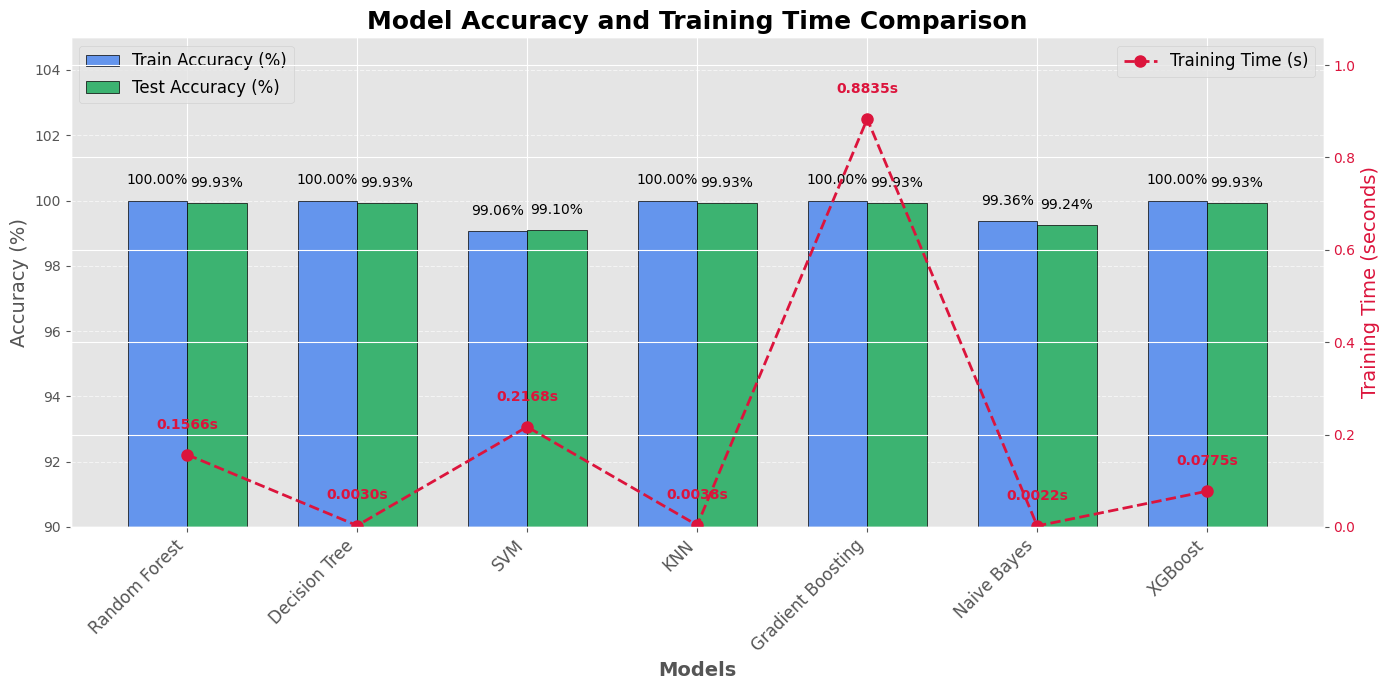

In [28]:
plt.style.use('ggplot')
models = [
    "Random Forest", "Decision Tree", "SVM", 
    "KNN", "Gradient Boosting", "Naive Bayes", "XGBoost"
]
train_acc = [100.00, 100.00, 99.06, 100.00, 100.00, 99.36, 100.00]
test_acc  = [99.93, 99.93, 99.10, 99.93, 99.93, 99.24, 99.93]
training_time = [0.1566, 0.0030, 0.2168, 0.0038, 0.8835, 0.0022, 0.0775]

x = np.arange(len(models))
width = 0.35

fig, ax1 = plt.subplots(figsize=(14, 7))

rects1 = ax1.bar(x - width/2, train_acc, width, label='Train Accuracy (%)',
                 color='cornflowerblue', edgecolor='black')
rects2 = ax1.bar(x + width/2, test_acc, width, label='Test Accuracy (%)',
                 color='mediumseagreen', edgecolor='black')

for rect in rects1 + rects2:
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width()/2., height + 0.4,
             f'{height:.2f}%', ha='center', va='bottom', fontsize=10)

ax1.set_xlabel('Models', fontsize=14, fontweight='bold')
ax1.set_ylabel('Accuracy (%)', fontsize=14)
ax1.set_title('Model Accuracy and Training Time Comparison', fontsize=18, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45, ha='right', fontsize=12)
ax1.set_ylim(90, 105)
ax1.legend(loc='upper left', fontsize=12)

ax2 = ax1.twinx()
ax2.plot(x, training_time, color='crimson', marker='o', linestyle='--', linewidth=2,
         markersize=8, label='Training Time (s)')
ax2.set_ylabel('Training Time (seconds)', fontsize=14, color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')
ax2.set_ylim(0, max(training_time) * 1.2)
ax2.legend(loc='upper right', fontsize=12)

for i, time in enumerate(training_time):
    ax2.text(x[i], time + 0.05, f'{time:.4f}s',
             color='crimson', ha='center', va='bottom', fontsize=10, fontweight='bold')

ax1.grid(True, axis='y', linestyle='--', alpha=0.6)
fig.tight_layout()
plt.show()

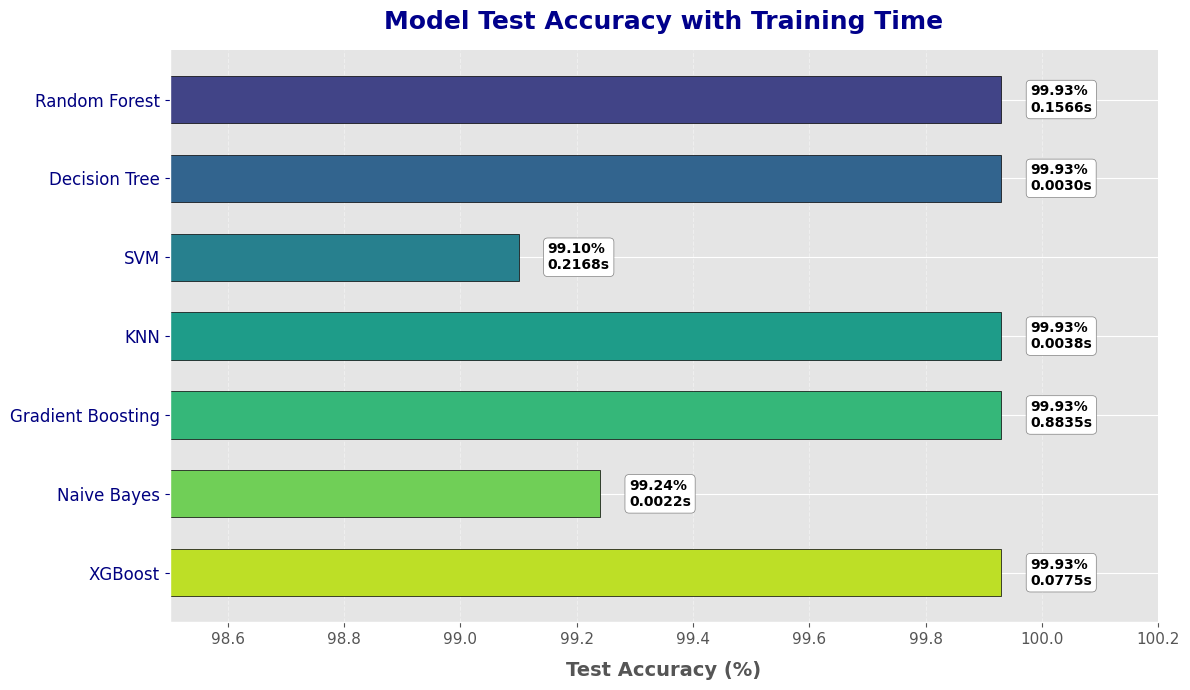

In [29]:
models = ["Random Forest", "Decision Tree", "SVM", "KNN", "Gradient Boosting", "Naive Bayes", "XGBoost"]
test_acc  = [99.93, 99.93, 99.10, 99.93, 99.93, 99.24, 99.93]
training_time = [0.1566, 0.0030, 0.2168, 0.0038, 0.8835, 0.0022, 0.0775]

colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(models)))

fig, ax = plt.subplots(figsize=(12, 7))
bars = ax.barh(models, test_acc, color=colors, edgecolor='black', height=0.6)

# Axis & title styles
ax.set_xlabel('Test Accuracy (%)', fontsize=14, labelpad=10, fontweight='bold')
ax.set_title('Model Test Accuracy with Training Time', fontsize=18, fontweight='bold', color='darkblue', pad=15)
ax.set_xlim(98.5, 100.2)
ax.invert_yaxis()
ax.grid(axis='x', linestyle='--', alpha=0.4)

for bar, t in zip(bars, training_time):
    width = bar.get_width()
    ax.text(width + 0.05, bar.get_y() + bar.get_height()/2,
            f'{width:.2f}%\n{t:.4f}s',
            va='center', fontsize=10, weight='bold', color='black', bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.3'))

ax.tick_params(axis='y', labelsize=12, colors='navy')
ax.tick_params(axis='x', labelsize=11)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

C:\Users\SARBAJIT\AppData\Local\Temp\ipykernel_19044\4151233566.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x="Model", y=metric, data=df, ax=ax, palette=palette)
C:\Users\SARBAJIT\AppData\Local\Temp\ipykernel_19044\4151233566.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df["Model"], rotation=45, ha="right", fontsize=12, fontweight='medium')
C:\Users\SARBAJIT\AppData\Local\Temp\ipykernel_19044\4151233566.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x="Model", y=metric, data=df, ax=ax, palette=palette)
C:\Users\SARBAJIT\AppData\Local\Temp\ipykernel_190

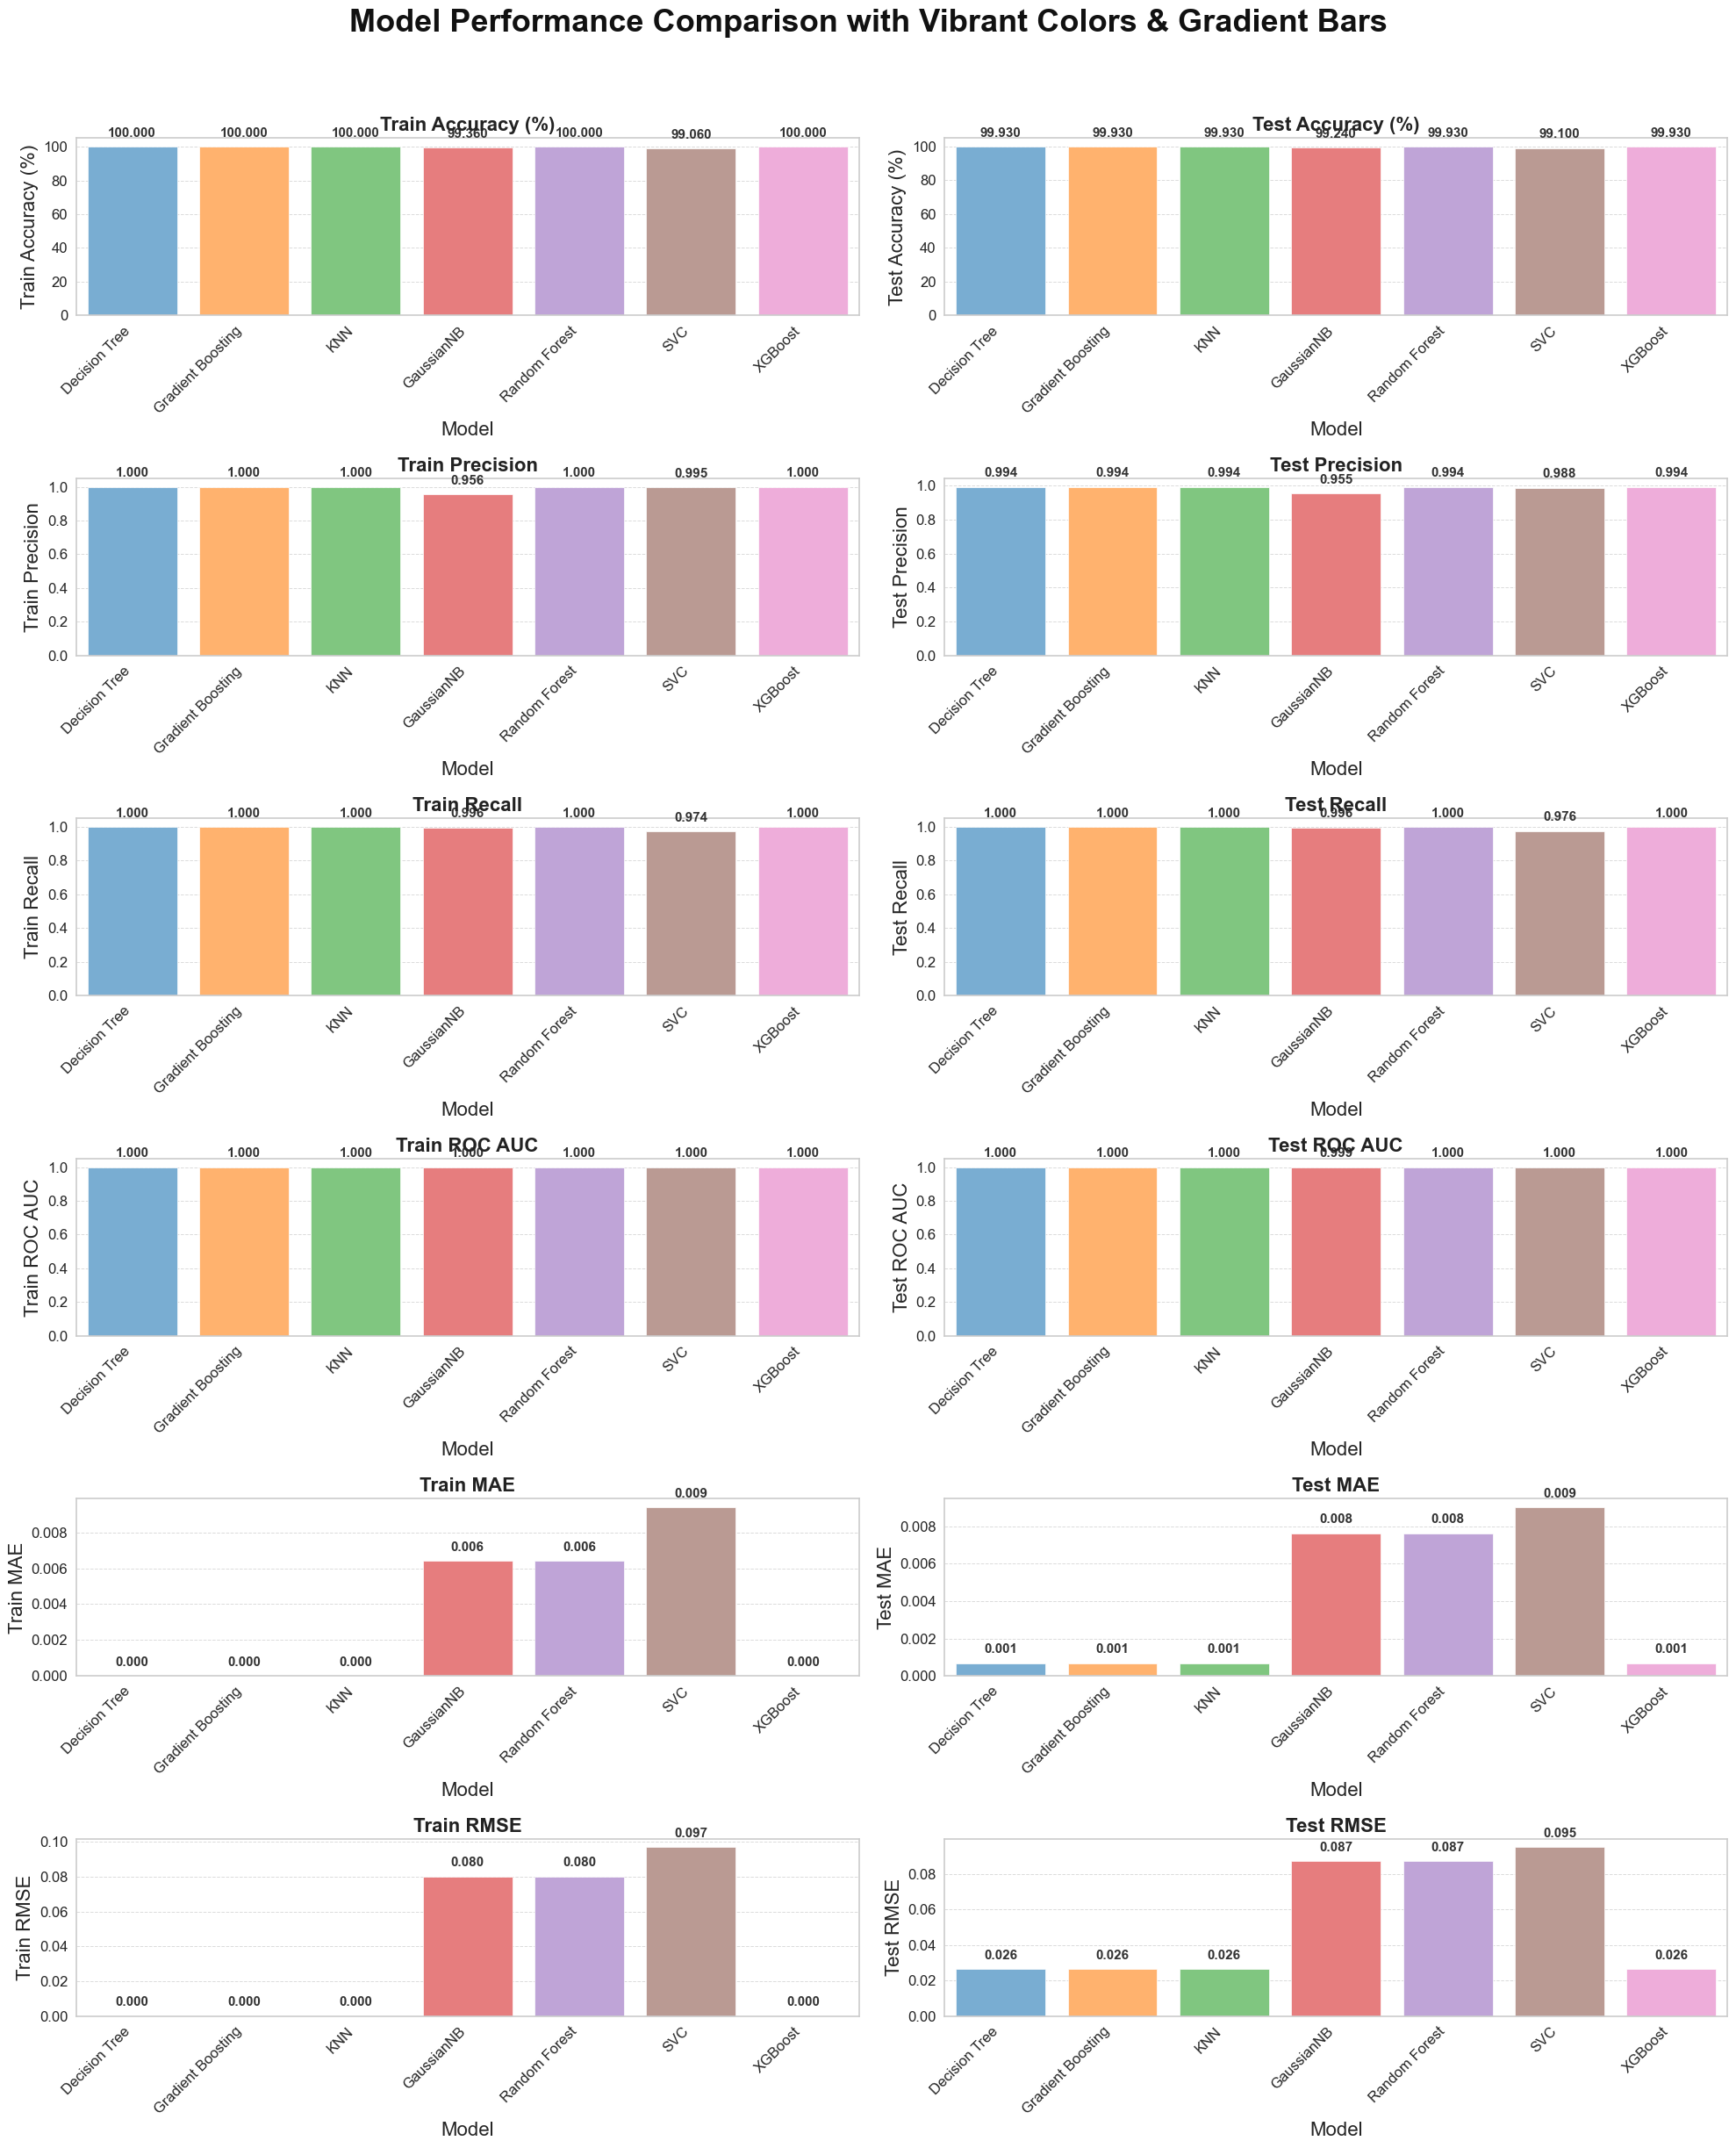

In [33]:
data = {
    "Model": [
        "Decision Tree", "Gradient Boosting", "KNN",
        "GaussianNB", "Random Forest", "SVC", "XGBoost"
    ],
    "Train Accuracy (%)": [100.0, 100.0, 100.0, 99.36, 100.0, 99.06, 100.0],
    "Test Accuracy (%)": [99.93, 99.93, 99.93, 99.24, 99.93, 99.10, 99.93],
    "Train MAE": [0.0, 0.0, 0.0, 0.0064, 0.0064, 0.0094, 0.0],
    "Test MAE": [0.00069, 0.00069, 0.00069, 0.00763, 0.00763, 0.00902, 0.00069],
    "Train RMSE": [0.0, 0.0, 0.0, 0.0801, 0.0801, 0.0968, 0.0],
    "Test RMSE": [0.0263, 0.0263, 0.0263, 0.0873, 0.0873, 0.0949, 0.0263],
    "Train Precision": [1.0, 1.0, 1.0, 0.9563, 1.0, 0.9952, 1.0],
    "Test Precision": [0.9938, 0.9938, 0.9938, 0.9549, 0.9938, 0.9880, 0.9938],
    "Train Recall": [1.0, 1.0, 1.0, 0.9964, 1.0, 0.9739, 1.0],
    "Test Recall": [0.9995, 0.9995, 0.9995, 0.9956, 0.9995, 0.9761, 0.9995],
    "Train ROC AUC": [1.0, 1.0, 1.0, 0.9995, 1.0, 1.0, 1.0],
    "Test ROC AUC": [0.9997, 0.9999, 0.9997, 0.9993, 0.9997, 1.0, 0.9999]
}

df = pd.DataFrame(data)

sns.set_style("whitegrid")
palette = sns.color_palette("tab10", len(df))  # Bright, distinct colors

metrics = [
    "Train Accuracy (%)", "Test Accuracy (%)",
    "Train Precision", "Test Precision",
    "Train Recall", "Test Recall",
    "Train ROC AUC", "Test ROC AUC",
    "Train MAE", "Test MAE",
    "Train RMSE", "Test RMSE"
]

fig, axs = plt.subplots(6, 2, figsize=(20, 24))
axs = axs.flatten()

cmap = plt.get_cmap("viridis")

for i, metric in enumerate(metrics):
    ax = axs[i]
    bars = sns.barplot(x="Model", y=metric, data=df, ax=ax, palette=palette)
    ax.set_title(metric, fontsize=16, fontweight='bold', color='#222222')
    ax.set_xticklabels(df["Model"], rotation=45, ha="right", fontsize=12, fontweight='medium')
    ax.tick_params(axis='y', labelsize=12)
    ax.grid(True, which='major', axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

    for j, bar in enumerate(bars.patches):
        height = bar.get_height()
        color = palette[j]
        gradient_color = np.array(color) * 0.6 + np.array([1,1,1]) * 0.4
        bar.set_facecolor(gradient_color)

        ax.annotate(f'{height:.3f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height), 
                    xytext=(0, 6), 
                    textcoords='offset points', 
                    ha='center', va='bottom', fontsize=11, fontweight='bold', color='#333333')

plt.suptitle("Model Performance Comparison with Vibrant Colors & Gradient Bars", fontsize=26, fontweight='bold', color='#111111', y=1.02)
plt.tight_layout()
plt.show()

In [31]:
SVC = SVC(probability=True)
SVC.fit(X_train, y_train.values.ravel())

SVC(probability=True)

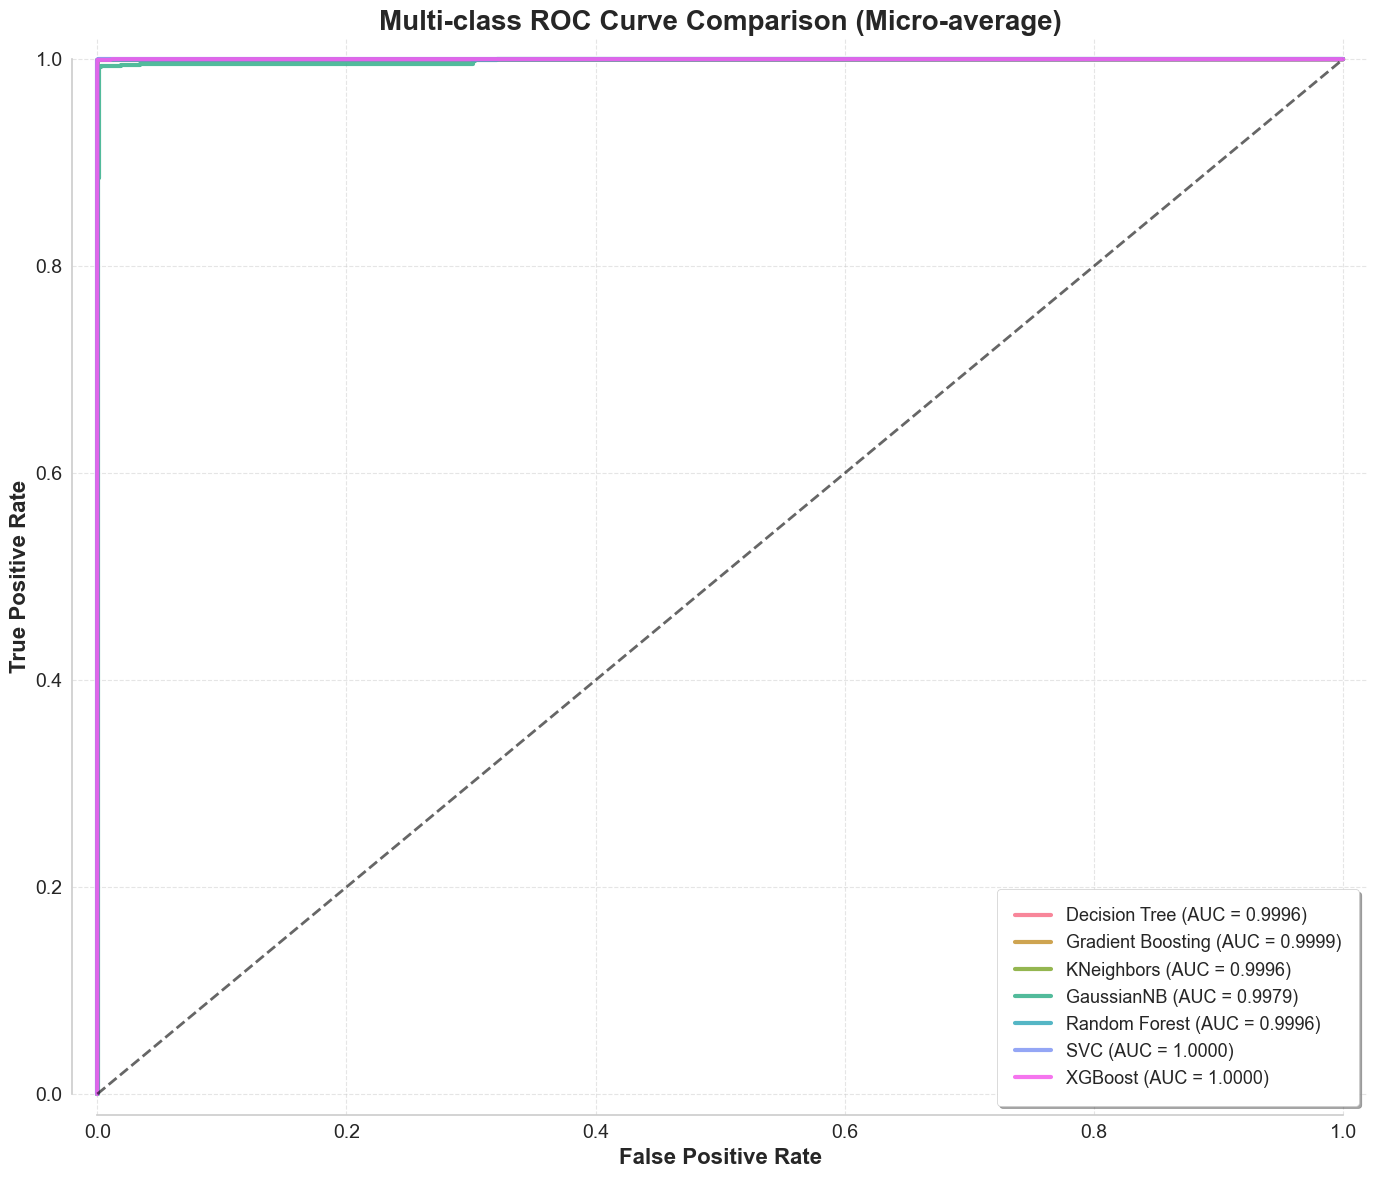

In [32]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
sns.set_style("whitegrid")
plt.rcParams.update({
    'font.size': 14,
    'axes.titlesize': 18,
    'axes.labelsize': 16,
    'legend.fontsize': 13,
    'figure.figsize': (14, 12),
    'axes.linewidth': 1.2,
    'grid.alpha': 0.3,
    'grid.linestyle': '--'
})

models = {
    "Decision Tree": DT,
    "Gradient Boosting": GB,
    "KNeighbors": KNN,
    "GaussianNB": NB,
    "Random Forest": RFC,
    "SVC": SVC,
    "XGBoost": XGB
}

classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

palette = sns.color_palette("husl", len(models))  # Beautiful distinct colors

plt.figure()

for i, (name, model) in enumerate(models.items()):
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    else:
        if hasattr(model, "decision_function"):
            decision_scores = model.decision_function(X_test)
            if len(decision_scores.shape) == 1:
                y_score = np.zeros((decision_scores.shape[0], n_classes))
                y_score[:, 1] = decision_scores
            else:
                y_score = decision_scores
        else:
            raise ValueError(f"Model {name} has neither predict_proba nor decision_function")

    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)

    plt.plot(
        fpr, tpr,
        color=palette[i],
        lw=3,
        label=f'{name} (AUC = {roc_auc:.4f})',
        alpha=0.85
    )

# Perfect diagonal baseline
plt.plot([0, 1], [0, 1], 'k--', lw=2, alpha=0.6)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])

plt.xlabel('False Positive Rate', fontsize=16, fontweight='semibold')
plt.ylabel('True Positive Rate', fontsize=16, fontweight='semibold')
plt.title('Multi-class ROC Curve Comparison (Micro-average)', fontsize=20, fontweight='bold')

plt.legend(loc='lower right', frameon=True, shadow=True, borderpad=1)
plt.grid(True, linestyle='--', linewidth=0.8, alpha=0.5)

sns.despine(trim=True)
plt.tight_layout()
plt.show()